## ML Lab 4
#### Ahmed Azaan 20K-1099
#### Bs AI-5A

#### Task 1)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
dataset = pd.read_csv(r'C:\Users\htc\Desktop\owid-covid-data (1).csv')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population,population_density,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,5,5,0.000,0,0,0.0,...,40099462,54.422,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,5,0,0.000,0,0,0.0,...,40099462,54.422,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,5,0,0.000,0,0,0.0,...,40099462,54.422,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,5,0,0.000,0,0,0.0,...,40099462,54.422,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,5,0,0.000,0,0,0.0,...,40099462,54.422,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189994,TWN,Asia,Taiwan,07-02-2020,16,0,0.857,0,0,0.0,...,23859912,0.000,0.000,8.353,0.000,103.957,0.00,0.0,80.46,0.000
189995,TWN,Asia,Taiwan,08-02-2020,17,1,1.000,0,0,0.0,...,23859912,0.000,0.000,8.353,0.000,103.957,0.00,0.0,80.46,0.000
189996,TWN,Asia,Taiwan,09-02-2020,18,1,1.143,0,0,0.0,...,23859912,0.000,0.000,8.353,0.000,103.957,0.00,0.0,80.46,0.000
189997,TWN,Asia,Taiwan,10-02-2020,18,0,1.143,0,0,0.0,...,23859912,0.000,0.000,8.353,0.000,103.957,0.00,0.0,80.46,0.000


In [30]:
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, 1].values
print("Matrix of features", X, sep='\n')
print("Target Variable", y, sep='\n')

Matrix of features
[['Afghanistan' '24-02-2020' 5 ... 9.59 0.5 64.83]
 ['Afghanistan' '25-02-2020' 5 ... 9.59 0.5 64.83]
 ['Afghanistan' '26-02-2020' 5 ... 9.59 0.5 64.83]
 ...
 ['Taiwan' '09-02-2020' 18 ... 0.0 0.0 80.46]
 ['Taiwan' '10-02-2020' 18 ... 0.0 0.0 80.46]
 ['Timor' '01-08-2021' 10966 ... 6.86 5.9 69.5]]
Target Variable
['Asia' 'Asia' 'Asia' ... 'Asia' 'Asia' 'Asia']


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5, nan: 6}
Label Encoded Target Variable
[1 1 1 ... 1 1 1]


In [32]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,X=_X,y=_y,cv=_cv,scoring=_scoring,return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Training Precision scores": results['train_precision'],
            "Mean Training Precision": results['train_precision'].mean(),
            "Training Recall scores": results['train_recall'],
            "Mean Training Recall": results['train_recall'].mean(),
            "Training F1 scores": results['train_f1'],
            "Mean Training F1 Score": results['train_f1'].mean(),
            "Validation Accuracy scores": results['test_accuracy'],
            "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
            "Validation Precision scores": results['test_precision'],
            "Mean Validation Precision": results['test_precision'].mean(),
            "Validation Recall scores": results['test_recall'],
            "Mean Validation Recall": results['test_recall'].mean(),
            "Validation F1 scores": results['test_f1'],
            "Mean Validation F1 Score": results['test_f1'].mean()
            }

In [33]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold", "6th Fold", "7th Fold", "8th Fold", "9th Fold", "10th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 10)
print(decision_tree_result)

{'Training Accuracy scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Accuracy': nan, 'Training Precision scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Precision': nan, 'Training Recall scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Recall': nan, 'Training F1 scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training F1 Score': nan, 'Validation Accuracy scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Accuracy': nan, 'Validation Precision scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Precision': nan, 'Validation Recall scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Recall': nan, 'Validation F1 scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation F1 Score': nan}


C:\Users\htc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\htc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\htc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\htc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\htc\anaconda3\lib\site-packages\sklearn\base.py", line 578, in 

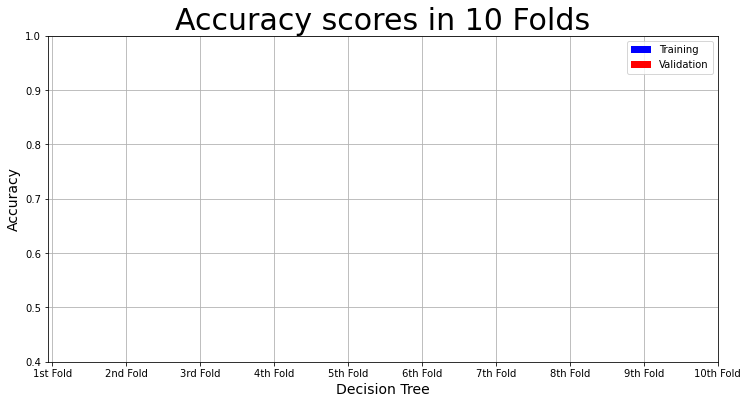

In [35]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

#### Task 2)

In [36]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [38]:
dat = pd.read_csv(r'C:\Users\htc\Desktop\diabetes.csv') 
print(dat.shape)
dat.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [39]:
dat=dat.round()
dat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,34.0,1.0,50,1
1,1,85,66,29,0,27.0,0.0,31,0
2,8,183,64,0,0,23.0,1.0,32,1
3,1,89,66,23,94,28.0,0.0,21,0
4,0,137,40,35,168,43.0,2.0,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,33.0,0.0,63,0
764,2,122,70,27,0,37.0,0.0,27,0
765,5,121,72,23,112,26.0,0.0,30,0
766,1,126,60,0,0,30.0,0.0,47,1


In [40]:
x1 = dat.drop('DiabetesPedigreeFunction', axis=1).values 
y1 = dat['DiabetesPedigreeFunction'].values

In [41]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=1000)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 64.50%


C:\Users\htc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Task 3) DT from scratch

In [46]:
from random import seed
from random import randrange
from csv import reader

def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)


def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
        
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

        
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root


def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

        
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)


seed(1)
filename = r'C:\Users\htc\Desktop\data-banknote-authentication.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

ValueError: could not convert string to float: 'Feature 1'